In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [28]:
resultsDf = pd.read_csv("/home/yhbedoya/Repositories/SHM-MAE/TrafficEstimation/TrafficEstimationResultsEvaluation.csv")
resultsDf.drop("index", axis=1, inplace=True)
resultsDf

,y_true,y_pred
0,1,1.230913
1,1,1.561031
2,1,1.390824
3,1,1.352947
4,0,1.206667
...,...,...
24153,1,1.223567
24154,1,1.219112
24155,2,1.403409
24156,1,1.134406


In [29]:
resultsDf["AE"] = np.abs(resultsDf["y_true"] - resultsDf["y_pred"])
resultsDf

,y_true,y_pred,AE
0,1,1.230913,0.230913
1,1,1.561031,0.561031
2,1,1.390824,0.390824
3,1,1.352947,0.352947
4,0,1.206667,1.206667
...,...,...,...
24153,1,1.223567,0.223567
24154,1,1.219112,0.219112
24155,2,1.403409,0.596591
24156,1,1.134406,0.134406


Text(0.5, 1.0, 'Absolute Error')

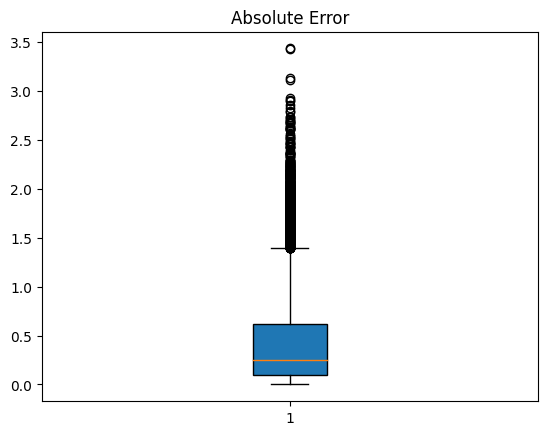

In [30]:
box1 = plt.boxplot(resultsDf["AE"], patch_artist=True)
plt.title("Absolute Error")


In [40]:
y_true = resultsDf["y_true"]
y_pred = resultsDf["y_pred"]

Text(0.5, 1.0, 'Real vs predicted values')

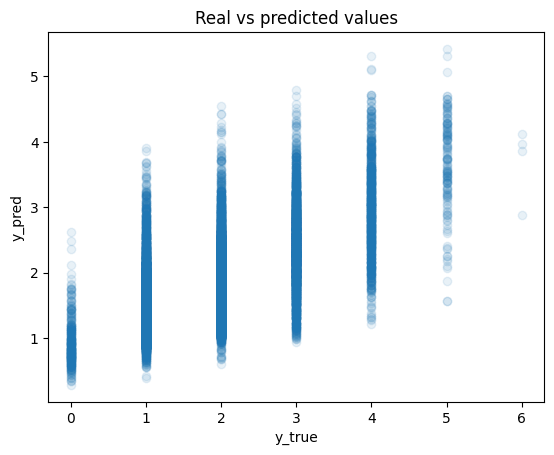

In [41]:
plt.scatter(y_true, y_pred, alpha=0.1)
plt.ylabel("y_pred")
plt.xlabel("y_true")
plt.title("Real vs predicted values")

In [42]:
r2_score(y_true, y_pred)

0.5335982855959869

In [43]:
MSE = ((np.array(y_true) - np.array(y_pred)) ** 2).mean()
MAE = (np.abs(np.array(y_true) - np.array(y_pred))).mean()
MSE, MAE

(0.350066776665382, 0.4121747151833761)

In [44]:
mae_percent = 100 * MAE / np.mean(y_true)
mae_percent

26.258746754746838